## Loading the standard libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [3]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
## Drop the customer Id column from the data 

data = data.drop('CustomerID', axis = 1)
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Selecting any two from the data to perform Kmeans clustering 

In [6]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Create a numpy array of the dataframe

In [7]:
X = X.iloc[:, :].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Applying Kmeans Clustering on the data 

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans

KMeans()

In [10]:
kmeans.fit(X)

KMeans()

In [11]:
kmeans.cluster_centers_

array([[ 78.55172414,  82.17241379],
       [ 47.06818182,  50.36363636],
       [109.7       ,  22.        ],
       [ 25.0952381 ,  80.04761905],
       [ 79.73913043,  13.39130435],
       [ 25.14285714,  19.52380952],
       [109.7       ,  82.        ],
       [ 63.80952381,  47.66666667]])

## Applying KMeans using different K value

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans

KMeans(n_clusters=3)

In [13]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [14]:
kmeans.cluster_centers_

array([[86.53846154, 82.12820513],
       [87.        , 18.63157895],
       [44.15447154, 49.82926829]])

## How to find the best value of k?

- The best of k is found using elbow method

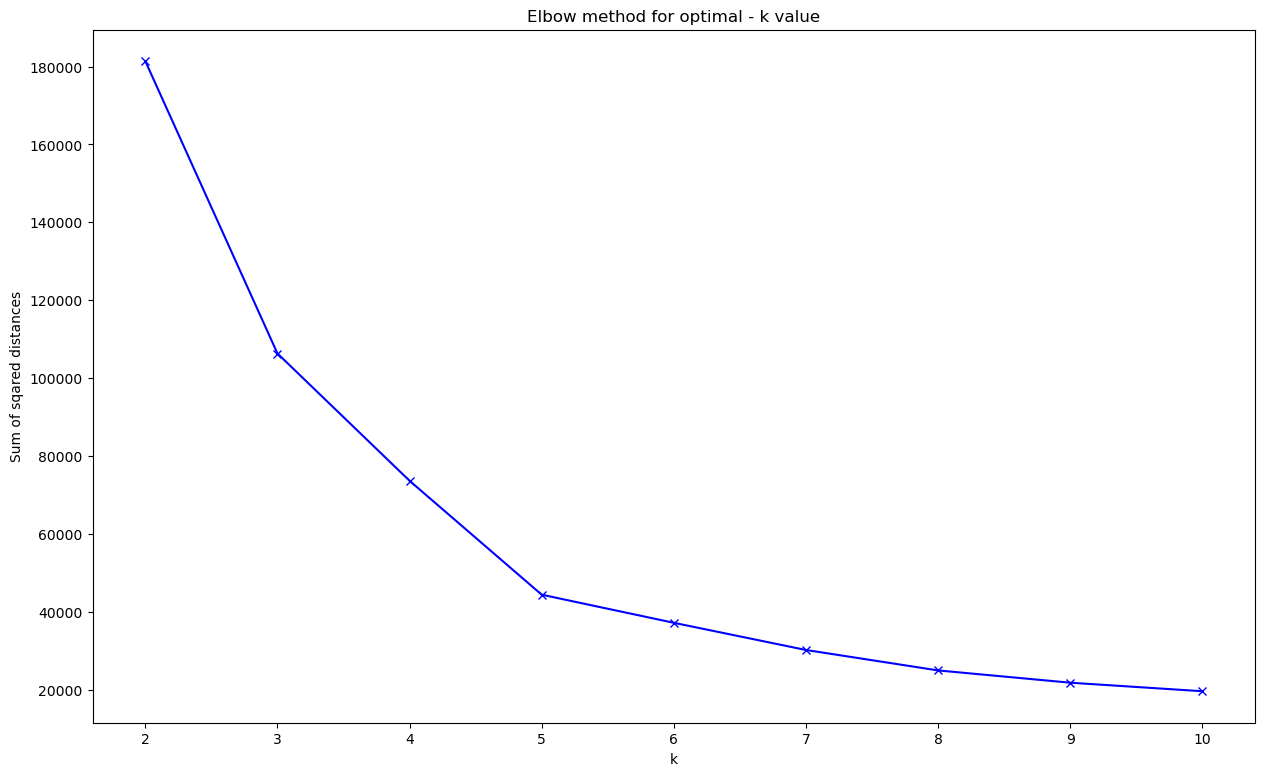

In [15]:
from sklearn.cluster import KMeans

wcss = []

for k in range(2, 11):
    km = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    km.fit(X)
    wcss.append(km.inertia_)
    
    
plt.figure(figsize = (15, 9))
K = range(2, 11)
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of sqared distances')
plt.title('Elbow method for optimal - k value')
plt.show()

## The best value of k for this data is 5

In [17]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [19]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])